### Customer Segmentation based on Credit Card Usage

In [1]:
# Aim of this project is to segment customers into different clusters based on their credit card usage.
# THe dataset used is taken from Kaggle (https://www.kaggle.com/arjunbhasin2013/ccdata)

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Read data

data = pd.read_csv("CC GENERAL.csv")

In [3]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
data.shape

(8950, 18)

There are 8950 records and 18 columns. 

In [5]:
# Let us delete CUST_ID column

data.drop(["CUST_ID"], axis = 1, inplace = True)
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
# Let us look for any duplicate records.

data.duplicated().sum()

0

There are no duplicate records.

In [7]:
# Let us look for any missing values

data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

There are missing values in CREDIT_LIMIT and MINIMUM_PAYMENTS.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MINIMUM_PAYMENTS', ylabel='Density'>

<Figure size 720x360 with 0 Axes>

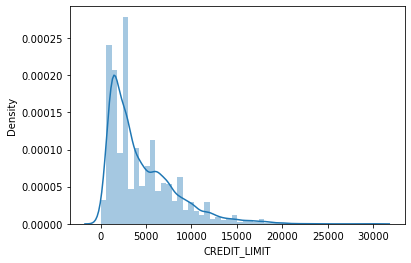

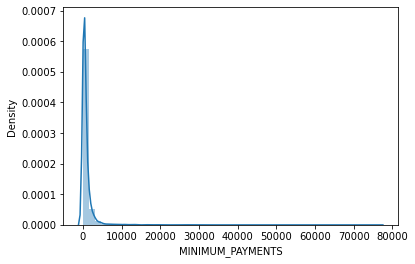

In [8]:
# Let us see the distribution of CREDIT_LIMIT and MINIMUM_PAYMENTS.

plt.figure(figsize = (10,5))

plt.subplots(1,1)
sns.distplot(data["CREDIT_LIMIT"])
plt.subplots(1,1)
sns.distplot(data["MINIMUM_PAYMENTS"])

In [9]:
# Let us impute the missing values with corresponding mean

data["CREDIT_LIMIT"].fillna(data["CREDIT_LIMIT"].mean(), inplace = True)
data["MINIMUM_PAYMENTS"].fillna(data["MINIMUM_PAYMENTS"].mean(), inplace = True)

In [10]:
# Let us verify

data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

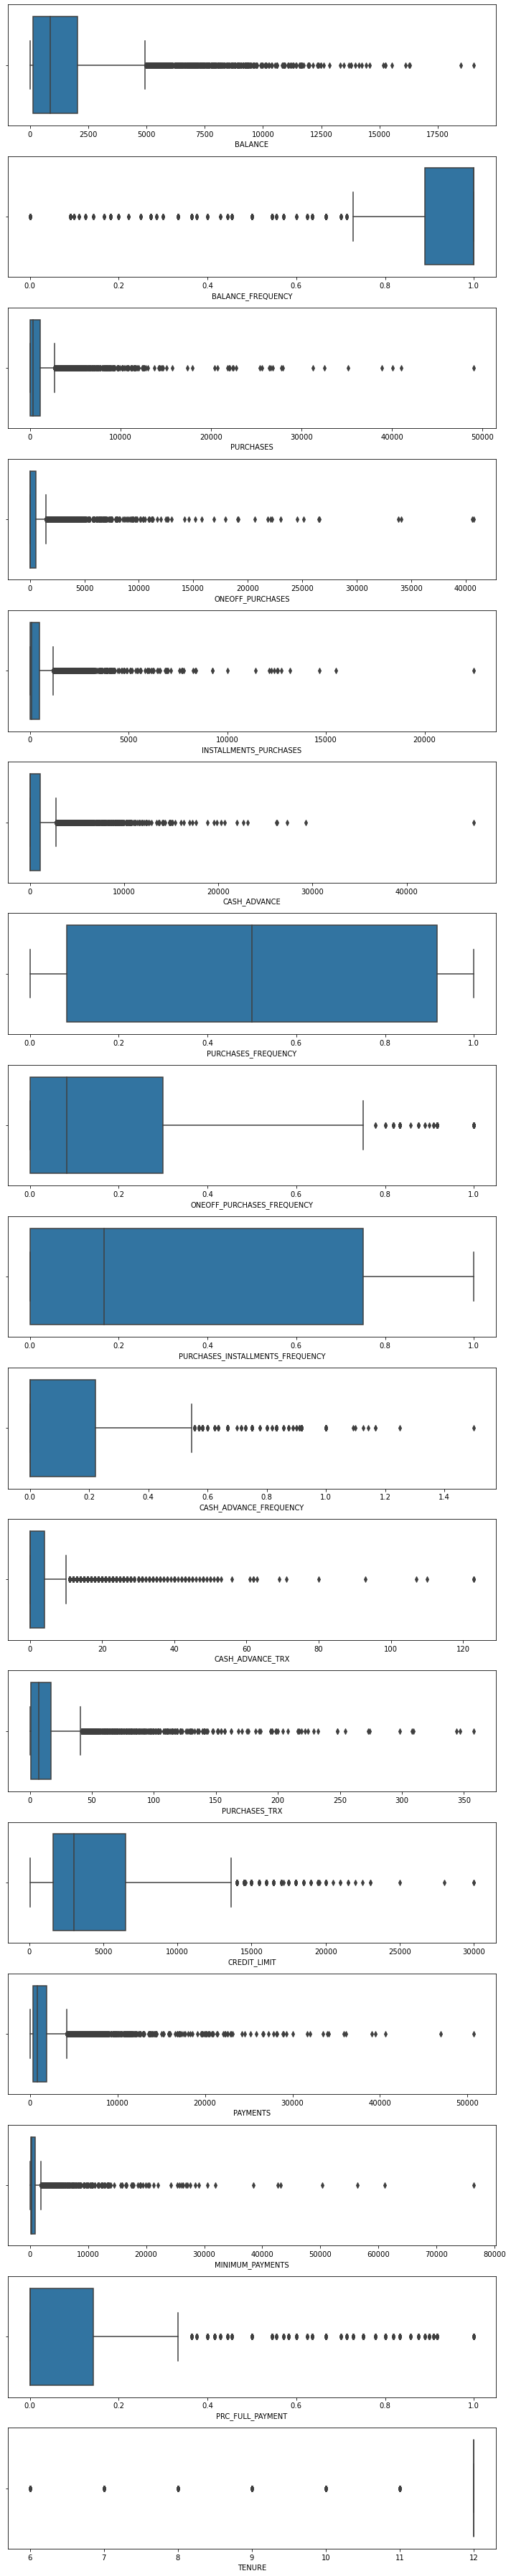

In [11]:
# Let us look for outliers
plt.figure(figsize = (10,50))
for i in range(len(data.columns)):
    plt.subplot(17,1,i+1)
    sns.boxplot(data[data.columns[i]])
    
plt.tight_layout()    

In [12]:
# There are outliers in all features. Dropping outliers will result in data loss. Hence, we will arrange the value into ranges.

data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [13]:
cols_1 = ["BALANCE", "PURCHASES","ONEOFF_PURCHASES", "INSTALLMENTS_PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]

for item in cols_1:
    col_name = item + "_Range"
    data.loc[(data[item]>=0) & (data[item]<= 500), col_name] = 1
    data.loc[(data[item]>500) & (data[item]<= 1000), col_name] = 2
    data.loc[(data[item]>1000) & (data[item]<= 3000), col_name] = 3
    data.loc[(data[item]>3000) & (data[item]<= 5000), col_name] = 4
    data.loc[(data[item]>5000) & (data[item]<= 10000), col_name] = 5
    data.loc[(data[item]>10000), col_name] = 6
   

In [14]:
cols_2 = ["BALANCE_FREQUENCY", "PURCHASES_FREQUENCY", "ONEOFF_PURCHASES_FREQUENCY", "PURCHASES_INSTALLMENTS_FREQUENCY", "CASH_ADVANCE_FREQUENCY", "PRC_FULL_PAYMENT"]

for item in cols_2:
    col_name = item + "_Range"
    data.loc[(data[item]>=0) & (data[item]<= 0.1), col_name] = 1
    data.loc[(data[item]>0.1) & (data[item]<= 0.2), col_name] = 2
    data.loc[(data[item]>0.2) & (data[item]<= 0.3), col_name] = 3
    data.loc[(data[item]>0.3) & (data[item]<= 0.4), col_name] = 4
    data.loc[(data[item]>0.4) & (data[item]<= 0.5), col_name] = 5
    data.loc[(data[item]>0.5) & (data[item]<= 0.6), col_name] = 6
    data.loc[(data[item]>0.6) & (data[item]<= 0.7), col_name] = 7
    data.loc[(data[item]>0.7) & (data[item]<= 0.8), col_name] = 8
    data.loc[(data[item]>0.8) & (data[item]<= 0.9), col_name] = 9
    data.loc[(data[item]>0.9) & (data[item]<= 1), col_name] = 10
    data.loc[(data[item]>1), col_name] = 11

In [15]:
cols_3 = ["CASH_ADVANCE_TRX", "PURCHASES_TRX"]

for item in cols_3:
    col_name = item + "_Range"
    data.loc[(data[item]>=0) & (data[item]<= 5), col_name] = 1
    data.loc[(data[item]>5) & (data[item]<= 10), col_name] = 2
    data.loc[(data[item]>10) & (data[item]<= 20), col_name] = 3
    data.loc[(data[item]>20) & (data[item]<= 30), col_name] = 4
    data.loc[(data[item]>30) & (data[item]<= 40), col_name] = 5
    data.loc[(data[item]>40) & (data[item]<=50), col_name] = 6
    data.loc[(data[item]>50) & (data[item]<= 100), col_name] = 7
    data.loc[(data[item]>100), col_name] = 8
    

In [16]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PAYMENTS_Range,MINIMUM_PAYMENTS_Range,BALANCE_FREQUENCY_Range,PURCHASES_FREQUENCY_Range,ONEOFF_PURCHASES_FREQUENCY_Range,PURCHASES_INSTALLMENTS_FREQUENCY_Range,CASH_ADVANCE_FREQUENCY_Range,PRC_FULL_PAYMENT_Range,CASH_ADVANCE_TRX_Range,PURCHASES_TRX_Range
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,1.0,1.0,9.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,4.0,3.0,10.0,1.0,1.0,1.0,3.0,3.0,1.0,1.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,2.0,2.0,10.0,10.0,10.0,1.0,1.0,1.0,1.0,3.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,1.0,2.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,2.0,1.0,10.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [17]:
# Let us drop original columns

data.drop([ 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE','PURCHASES_FREQUENCY',  'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS','MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT' ], axis=1, inplace=True)

In [18]:
data.shape

(8950, 17)

In [19]:
data.head()

,TENURE,BALANCE_Range,PURCHASES_Range,ONEOFF_PURCHASES_Range,INSTALLMENTS_PURCHASES_Range,CASH_ADVANCE_Range,CREDIT_LIMIT_Range,PAYMENTS_Range,MINIMUM_PAYMENTS_Range,BALANCE_FREQUENCY_Range,PURCHASES_FREQUENCY_Range,ONEOFF_PURCHASES_FREQUENCY_Range,PURCHASES_INSTALLMENTS_FREQUENCY_Range,CASH_ADVANCE_FREQUENCY_Range,PRC_FULL_PAYMENT_Range,CASH_ADVANCE_TRX_Range,PURCHASES_TRX_Range
0,12,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,9.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
1,12,4.0,1.0,1.0,1.0,5.0,5.0,4.0,3.0,10.0,1.0,1.0,1.0,3.0,3.0,1.0,1.0
2,12,3.0,2.0,2.0,1.0,1.0,5.0,2.0,2.0,10.0,10.0,10.0,1.0,1.0,1.0,1.0,3.0
3,12,3.0,3.0,3.0,1.0,1.0,5.0,1.0,2.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,12,2.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,10.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [20]:
data.describe()

,TENURE,BALANCE_Range,PURCHASES_Range,ONEOFF_PURCHASES_Range,INSTALLMENTS_PURCHASES_Range,CASH_ADVANCE_Range,CREDIT_LIMIT_Range,PAYMENTS_Range,MINIMUM_PAYMENTS_Range,BALANCE_FREQUENCY_Range,PURCHASES_FREQUENCY_Range,ONEOFF_PURCHASES_FREQUENCY_Range,PURCHASES_INSTALLMENTS_FREQUENCY_Range,CASH_ADVANCE_FREQUENCY_Range,PRC_FULL_PAYMENT_Range,CASH_ADVANCE_TRX_Range,PURCHASES_TRX_Range
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,11.517318,2.298436,1.819888,1.499330,1.381006,1.758212,3.778547,2.362458,1.667263,8.940112,5.356089,2.679218,4.273743,2.046034,2.292626,1.321341,2.476313
std,1.338331,1.305664,1.126071,0.939653,0.769921,1.206511,1.175279,1.247377,0.983443,2.230286,3.777387,2.784590,3.684194,1.830053,2.678901,0.789629,1.807982
min,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,12.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,10.000000,5.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000
75%,12.000000,3.000000,3.000000,2.000000,1.000000,3.000000,5.000000,3.000000,2.000000,10.000000,10.000000,3.000000,8.000000,3.000000,2.000000,1.000000,3.000000
max,12.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,10.000000,10.000000,10.000000,10.000000,11.000000,10.000000,8.000000,8.000000


In [22]:
# Now, let us scale the feature values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scale = scaler.fit_transform(data)

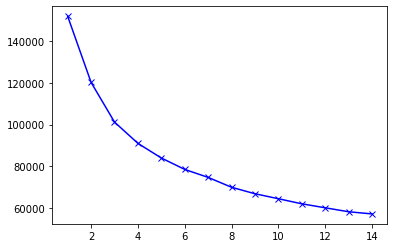

In [24]:
# Let us try K-Means Clustering.
# First, we will find the K value


from sklearn.cluster import KMeans

inertia = []
k_values = range(1,15)

for i in k_values:
    kmeans = KMeans(i)
    kmeans.fit_predict(data_scale)
    inertia.append(kmeans.inertia_)
    
plt.plot(k_values,inertia,"bx-")
    

In [25]:
# Let us select K = 6

kmeans_model = KMeans(6)
kmeans_model.fit_predict(data_scale)


array([0, 4, 1, ..., 3, 0, 1])

In [26]:
data_cluster = pd.concat([data,pd.DataFrame({"Cluster":kmeans_model.labels_})], axis = 1)

In [27]:
data_cluster.head()

,TENURE,BALANCE_Range,PURCHASES_Range,ONEOFF_PURCHASES_Range,INSTALLMENTS_PURCHASES_Range,CASH_ADVANCE_Range,CREDIT_LIMIT_Range,PAYMENTS_Range,MINIMUM_PAYMENTS_Range,BALANCE_FREQUENCY_Range,PURCHASES_FREQUENCY_Range,ONEOFF_PURCHASES_FREQUENCY_Range,PURCHASES_INSTALLMENTS_FREQUENCY_Range,CASH_ADVANCE_FREQUENCY_Range,PRC_FULL_PAYMENT_Range,CASH_ADVANCE_TRX_Range,PURCHASES_TRX_Range,Cluster
0,12,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,9.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0
1,12,4.0,1.0,1.0,1.0,5.0,5.0,4.0,3.0,10.0,1.0,1.0,1.0,3.0,3.0,1.0,1.0,4
2,12,3.0,2.0,2.0,1.0,1.0,5.0,2.0,2.0,10.0,10.0,10.0,1.0,1.0,1.0,1.0,3.0,1
3,12,3.0,3.0,3.0,1.0,1.0,5.0,1.0,2.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
4,12,2.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,10.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0


### Interpretation of Clusters

In [33]:
data_cluster["Cluster"].value_counts(sort = True)

0    2566
3    1885
4    1272
5    1237
1    1129
2     861
Name: Cluster, dtype: int64

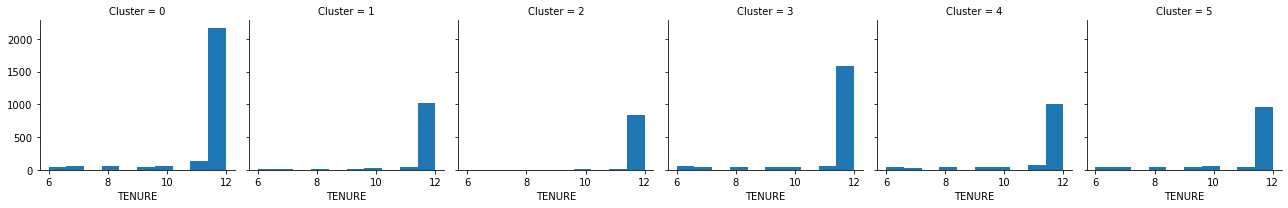

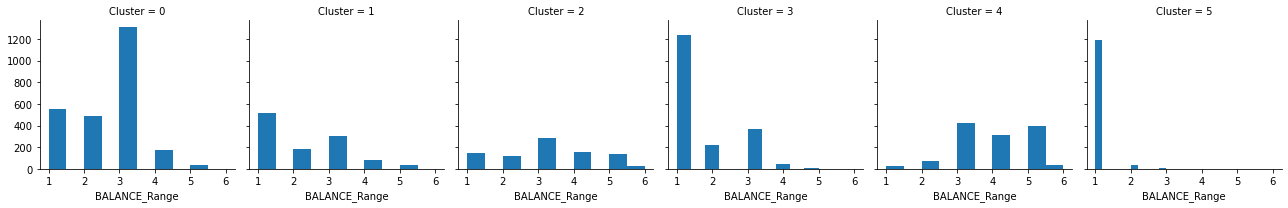

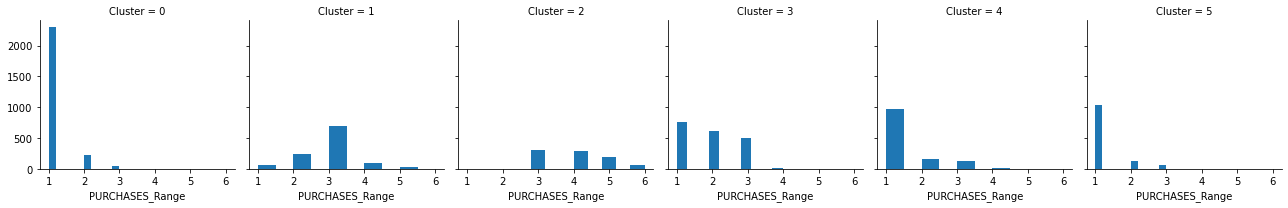

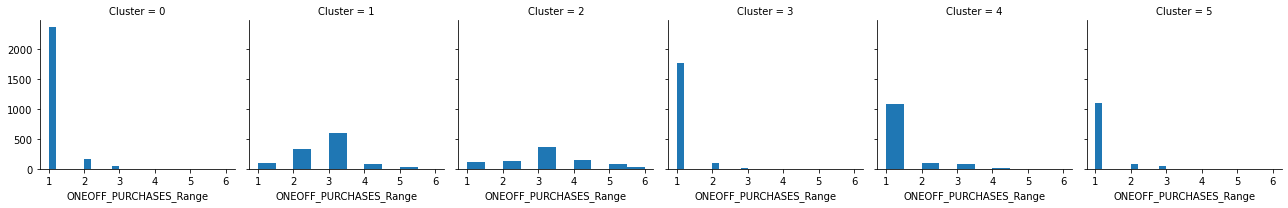

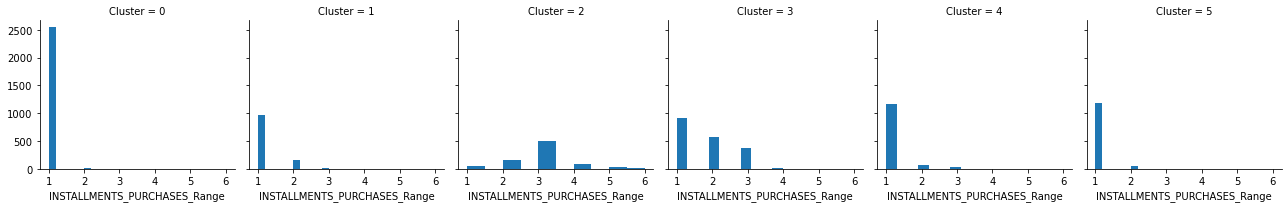

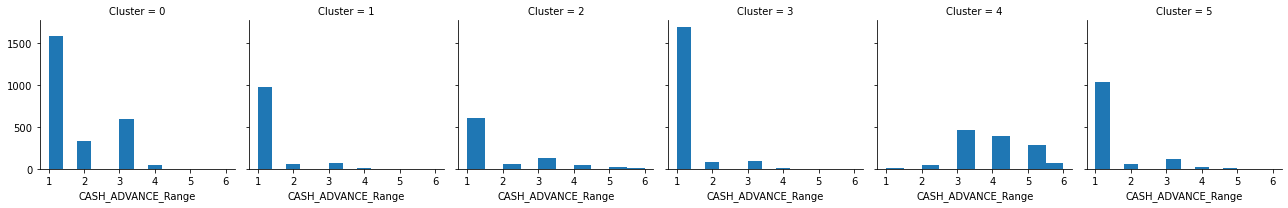

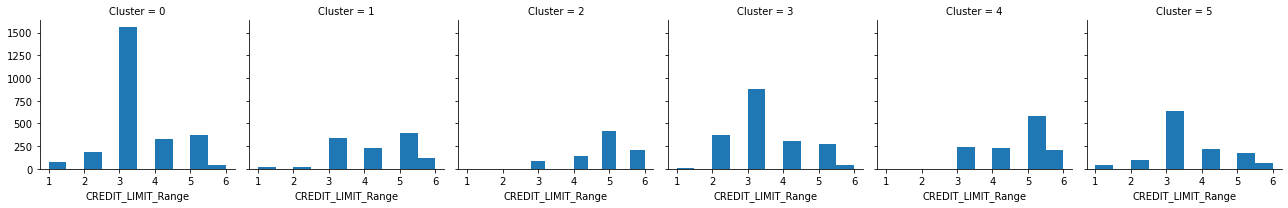

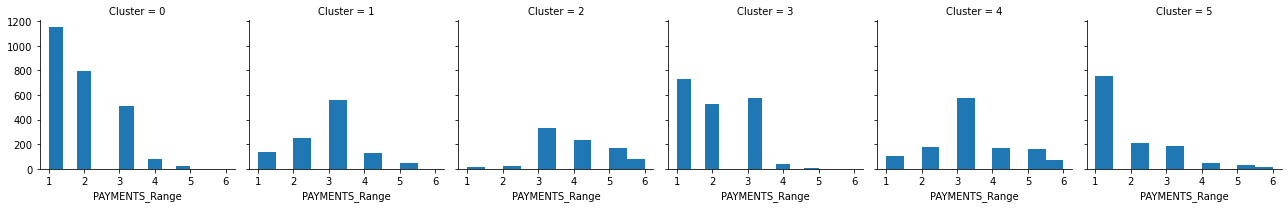

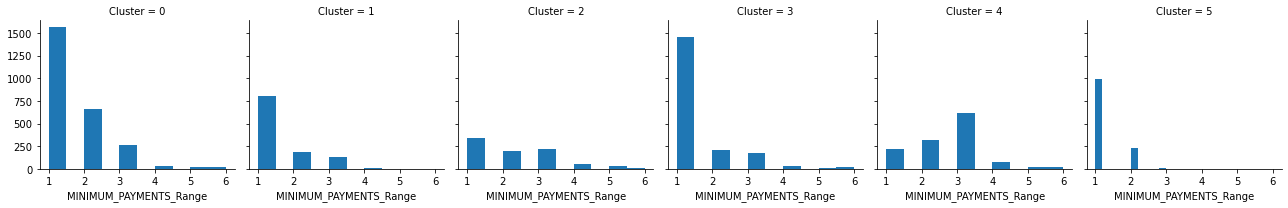

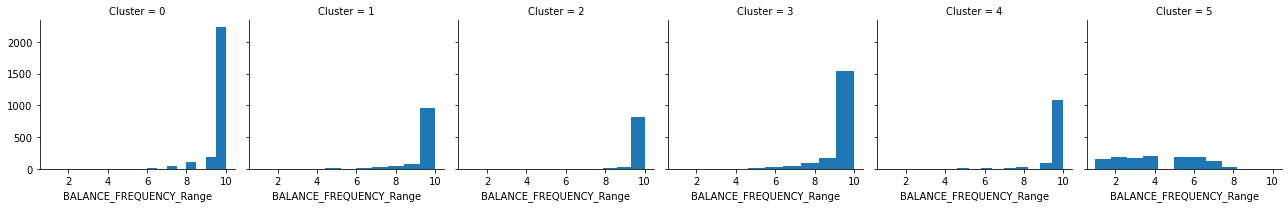

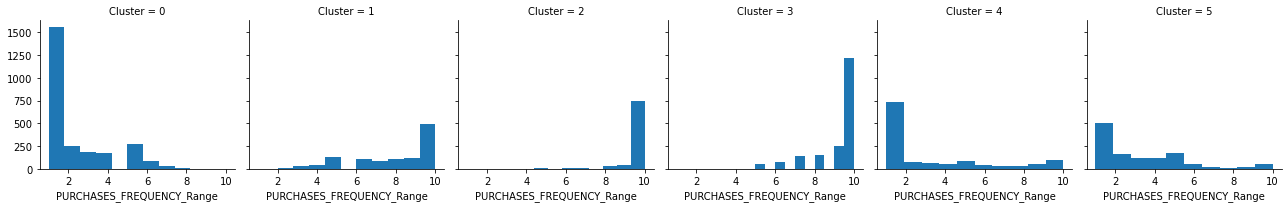

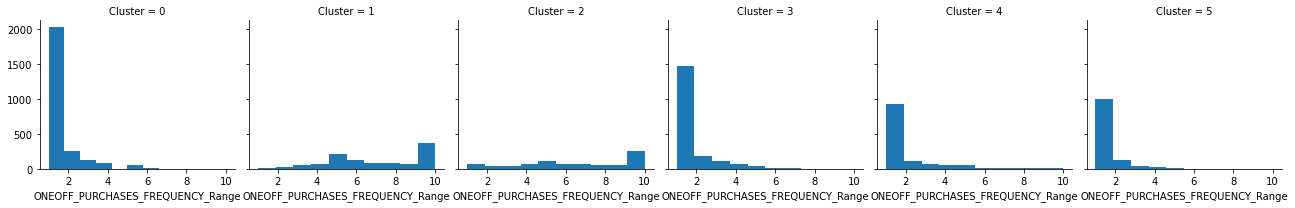

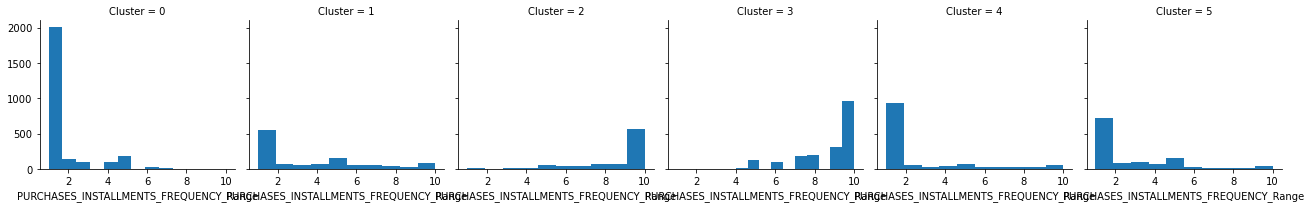

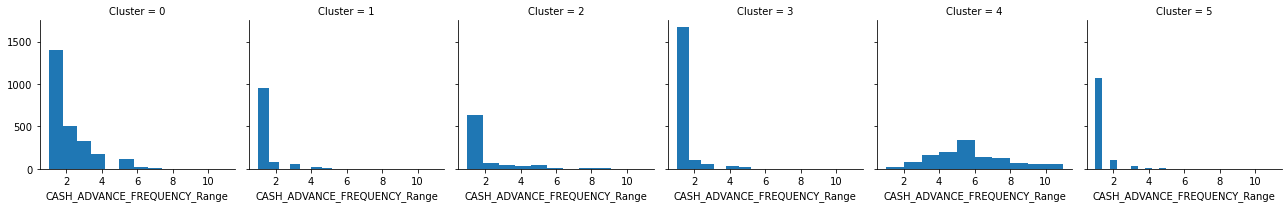

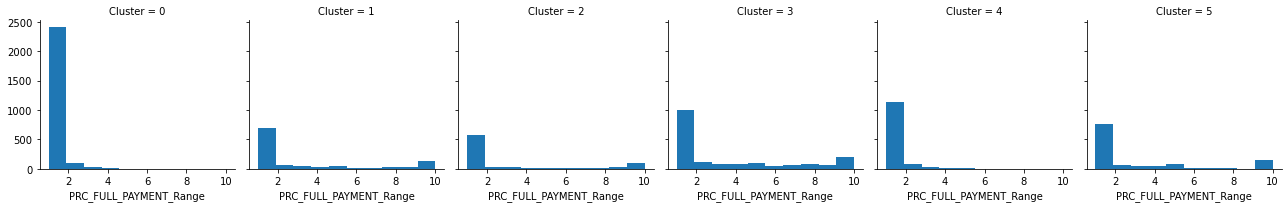

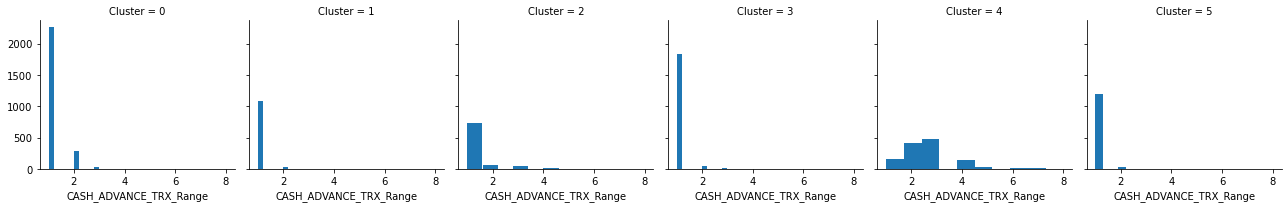

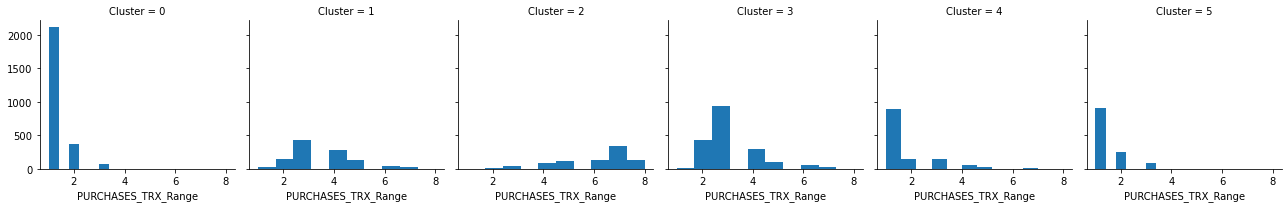

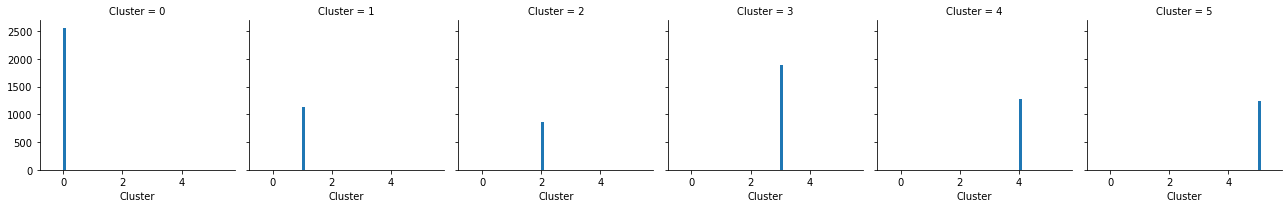

In [30]:
for c in data_cluster:
    grid= sns.FacetGrid(data_cluster, col='Cluster')
    grid.map(plt.hist, c)